ZQ_161
ZQ_174
TASTE_T33
TASTE_T03


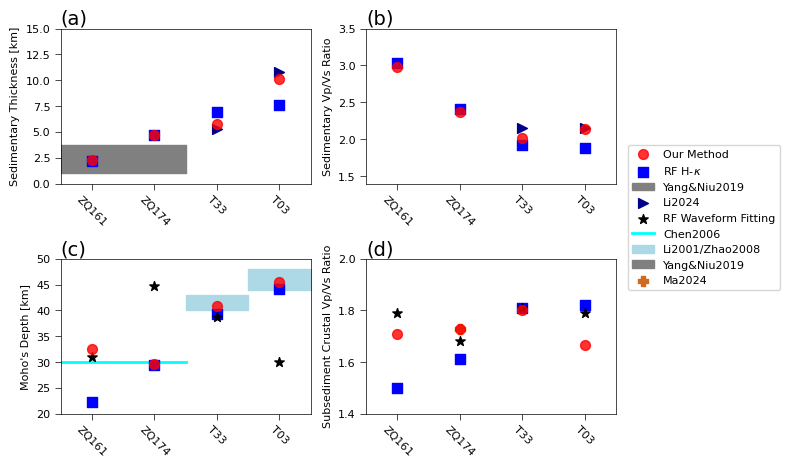

In [2]:
from matplotlib.pyplot import tight_layout
from HkVp_multilayer.plotting import Plot_HkVp
import matplotlib.pyplot as plt
import numpy as np
from glob import glob

outresultdir = "seismic_data_RFAC"

stationnames = ["ZQ_161","ZQ_174","TASTE_T33","TASTE_T03"]
stationname_labels = ["ZQ161","ZQ174","T33","T03"]
fig, axs = plt.subplots(2,2,figsize=(16/2.54,12/2.54),tight_layout=True)
plt.rcParams.update({'font.size':10})
markersize = 50

for i,stationname in enumerate(stationnames[:]):
    print(stationname)

    if stationname=="TASTE_T03":
        save_filename = f"Hk_result_52_pws2_3layer_Hk_result.npz"
        datadir = f"{outresultdir}/{stationname}"
        plot_instance = Plot_HkVp(savefile=f"{datadir}/{save_filename}")
        Vps,Ks,Thicks = plot_instance.get_optmodel()
        Hs1_RFAC2layer = Thicks[0]
        Ks1_RFAC2layer = Ks[0]
        Hs2_RFAC2layer = Thicks[1]
        Ks2_RFAC2layer = Ks[1]
        Hm_RFAC2layer = Thicks[2]
        Km_RFAC2layer = Ks[2]
        axs[0,0].scatter([i],[Hs1_RFAC2layer+Hs2_RFAC2layer],marker='o',s=markersize,color='red',alpha=0.8,zorder=100)
        axs[0,1].scatter([i],[(Ks2_RFAC2layer*Hs2_RFAC2layer+Ks1_RFAC2layer*Hs1_RFAC2layer)/(Hs1_RFAC2layer+Hs2_RFAC2layer)],marker='o',s=markersize,color='red',alpha=0.8,zorder=100)
        axs[1,0].scatter([i],[Hm_RFAC2layer+Hs1_RFAC2layer+Hs2_RFAC2layer],s=markersize,marker='o',color='red',alpha=0.8,zorder=100)
        axs[1,1].scatter([i],[Km_RFAC2layer],marker='o',s=markersize,color='red',alpha=0.8,zorder=100)  
   
    else:
        save_filename = f"Hk_result_52_pws2_Hk_result.npz"
        datadir = f"{outresultdir}/{stationname}"
        plot_instance = Plot_HkVp(savefile=f"{datadir}/{save_filename}")
        Vps,Ks,Thicks = plot_instance.get_optmodel()
        Hs_RFAC2layer = Thicks[0]
        Ks_RFAC2layer = Ks[0]
        Hm_RFAC2layer = Thicks[1]
        Km_RFAC2layer = Ks[1]
        handle3 = axs[0,0].scatter([i],[Hs_RFAC2layer],marker='o',s=markersize,color='red',alpha=0.8,label="Our Method" if i==2 else "",zorder=100)
        axs[0,1].scatter([i],[Ks_RFAC2layer],marker='o',s=markersize,color='red',alpha=0.8,zorder=100)
        axs[1,0].scatter([i],[Hm_RFAC2layer+Hs_RFAC2layer],s=markersize,marker='o',color='red',alpha=0.8,zorder=100)
        axs[1,1].scatter([i],[Km_RFAC2layer],marker='o',s=markersize,color='red',alpha=0.8,zorder=100) 
    ##load results of sequential RF H-k stacking, Resonance filter H-k stacking, RF waveform fitting, and our method
    file_RF2layer = f"Hk_RF2layer/{stationname}/{stationname}_Hk_result.dat"
    data_RF2layer = np.loadtxt(file_RF2layer,skiprows=1)
    Hs_RF2layer = data_RF2layer[0,1]
    Ks_RF2layer = data_RF2layer[0,2]
    Hm_RF2layer = data_RF2layer[1,1]
    Km_RF2layer = data_RF2layer[1,2]
    handle1= axs[0,0].scatter([i],[Hs_RF2layer],marker='s',s=markersize,color='blue',label=r"RF H-$\kappa$" if i==2 else "")
    axs[0,1].scatter([i],[Ks_RF2layer],marker='s',s=markersize,color='blue')
    axs[1,0].scatter([i],[Hm_RF2layer+Hs_RF2layer],s=markersize,marker='s',color='blue')
    axs[1,1].scatter([i],[Km_RF2layer],marker='s',s=markersize,color='blue')     
    

    # file_RF2layer_DeRe = f"Hk_RF2layer_DeRe/{stationname}/{stationname}_Hk_result.dat"
    # data_RF2layer_DeRe = np.loadtxt(file_RF2layer_DeRe,skiprows=1)
    # Hs_RF2layer_DeRe = data_RF2layer_DeRe[1,1]
    # Ks_RF2layer_DeRe = data_RF2layer_DeRe[1,2]
    # Hm_RF2layer_DeRe = data_RF2layer_DeRe[0,1]
    # Km_RF2layer_DeRe = data_RF2layer_DeRe[0,2]
    # handle2 = axs[0,0].scatter([i],[Hs_RF2layer_DeRe],marker='x',s=markersize,color='orange',alpha=0.5,label="Yu2015" if i==2 else "")
    # axs[0,1].scatter([i],[Ks_RF2layer_DeRe],marker='x',s=markersize,color='orange',alpha=1)
    # axs[1,0].scatter([i],[Hm_RF2layer_DeRe+Hs_RF2layer_DeRe],s=markersize,marker='x',color='orange',alpha=0.5)
    # axs[1,1].scatter([i],[Km_RF2layer_DeRe],marker='x',s=markersize,color='orange',alpha=1)   



    file_RFfit = f"Hk_RFfit2layer/{stationname}/wfit_result.dat"
    data_RFfit = np.loadtxt(file_RFfit)
    Hm_RFfit = data_RFfit[0]
    Km_RFfit = data_RFfit[1]

    handle4 = axs[1,0].scatter([i],[Hm_RFfit],marker='*',s=markersize,color='black',alpha=1,label="RF Waveform Fitting" if i==2 else "")
    axs[1,1].scatter([i],[Km_RFfit],marker='*',s=markersize,color='black',alpha=1)
    if i==2:
        handles = [handle1,handle3,handle4]  

   ##plot sedimentary thickness

axs[0,0].fill_between([-0.5,1.5],[1.0,1.0],[3.7,3.7],color='gray',zorder=-1,label="Yang&Niu2019")
axs[1,0].plot([-0.5,1.5],[30,30],lw=2,color='cyan',alpha=1,zorder=-1,label="Chen2006")

axs[1,0].fill_between([1.5,2.5],[40,40],[43,43],color='lightblue',zorder=-1,label="Li2001/Zhao2008")
axs[1,0].fill_between([2.5,3.5],[44,44],[48,48],color='lightblue',zorder=-1)
axs[1,0].fill_between([-0.5,1.5],[1.0,1.0],[3.7,3.7],color='gray',zorder=-1,label="Yang&Niu2019")
axs[1,1].scatter([1],[1.73],marker='P',s=markersize,color='chocolate',alpha=1.,zorder=1,label="Ma2024")
axs[0,1].scatter([2,3],[2.15,2.15],marker='>',s=markersize,color='darkblue',alpha=1,zorder=1)
axs[0,0].scatter([2,3],[5.33,10.8],marker='>',s=markersize,color='darkblue',alpha=1,zorder=1,label="Li2024")



axs[0,0].set_xticks(np.arange(len(stationnames)))
axs[0,0].set_xticklabels(stationname_labels,rotation=-45)
ymin,ymax = axs[0,0].get_ylim()
axs[0,0].set_ylim(0,15)
axs[0,0].set_xlim(-0.5,3.5)
axs[0,0].set_ylabel("Sedimentary Thickness [km]")
ymin,ymax = axs[0,0].get_ylim()
xmin,xmax = axs[0,0].get_xlim()
axs[0,0].text(xmin,ymax,"(a)",fontsize=14,verticalalignment='bottom',horizontalalignment='left')



axs[0,1].set_xticks(np.arange(len(stationnames)))
axs[0,1].set_xticklabels(stationname_labels,rotation=-45)
axs[0,1].set_ylim(1.4,3.5)
axs[0,1].set_xlim(-0.5,3.5)
axs[0,1].set_ylabel("Sedimentary Vp/Vs Ratio")
ymin,ymax = axs[0,1].get_ylim()
xmin,xmax = axs[0,1].get_xlim()
axs[0,1].text(xmin,ymax,"(b)",fontsize=14,verticalalignment='bottom',horizontalalignment='left')


axs[1,0].set_xticks(np.arange(len(stationnames)))
axs[1,0].set_xticklabels(stationname_labels,rotation=-45)
axs[1,0].set_ylim(20,50)
axs[1,0].set_xlim(-0.5,3.5)
axs[1,0].set_ylabel("Moho's Depth [km]")
ymin,ymax = axs[1,0].get_ylim()
xmin,xmax = axs[1,0].get_xlim()
axs[1,0].text(xmin,ymax,"(c)",fontsize=14,verticalalignment='bottom',horizontalalignment='left')


axs[1,1].set_xticks(np.arange(len(stationnames)))
axs[1,1].set_xticklabels(stationname_labels,rotation=-45)
axs[1,1].set_ylim(1.4,2.0)
axs[1,1].set_xlim(-0.5,3.5)
axs[1,1].set_ylabel("Subsediment Crustal Vp/Vs Ratio")
ymin,ymax = axs[1,1].get_ylim()
xmin,xmax = axs[1,1].get_xlim()
axs[1,1].text(xmin,ymax,"(d)",fontsize=14,verticalalignment='bottom',horizontalalignment='left')





fig.legend(bbox_to_anchor=[1,0.6,0.25,0.1],facecolor='white',framealpha=0.8)
plt.savefig("Results_DiffMethod.jpg",dpi=900,bbox_inches='tight')
plt.show()




ZQ_170
ZQ_161


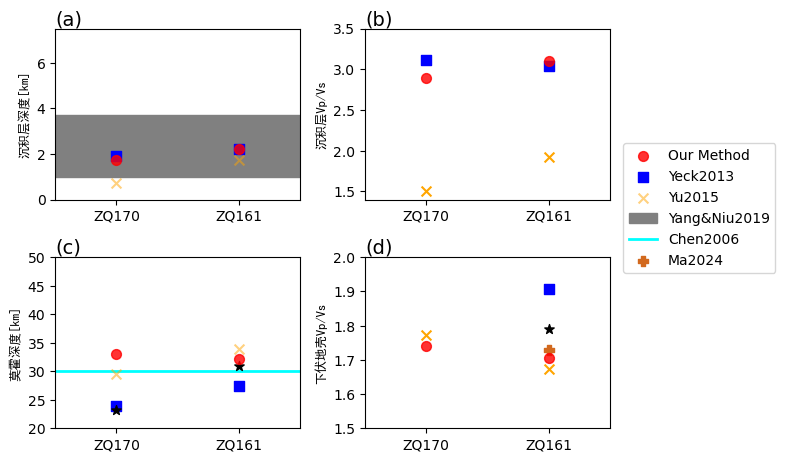

In [7]:
from matplotlib.pyplot import tight_layout
import matplotlib.pyplot as plt
import numpy as np
from glob import glob

stationnames = ["ZQ_170","ZQ_161"]
stationname_labels = ["ZQ170","ZQ161"]
fig, axs = plt.subplots(2,2,figsize=(16/2.54,12/2.54),tight_layout=True)
from matplotlib.font_manager import FontProperties
plt.rcParams.update({"font.size":10})
zhfont1 = FontProperties(fname='/usr/share/fonts/font/simhei.ttf', size=9)
markersize = 50

for i,stationname in enumerate(stationnames[:]):
    print(stationname)
    if i==3:
        file_RFAC2layer = f"Hkresults_3layer_2sedi/{stationname}/{stationname}_Hk_result.dat"
        data_RFAC2layer = np.loadtxt(file_RFAC2layer,skiprows=1)
        Hs1_RFAC2layer = data_RFAC2layer[0,1]
        Ks1_RFAC2layer = data_RFAC2layer[0,2]
        Hs2_RFAC2layer = data_RFAC2layer[1,1]
        Ks2_RFAC2layer = data_RFAC2layer[1,2]
        Hm_RFAC2layer = data_RFAC2layer[2,1]
        Km_RFAC2layer = data_RFAC2layer[2,2]
        axs[0,0].scatter([i],[Hs1_RFAC2layer+Hs2_RFAC2layer],marker='o',s=markersize,color='red',alpha=0.8,zorder=100)
        axs[0,1].scatter([i],[(Ks2_RFAC2layer*Hs2_RFAC2layer+Ks1_RFAC2layer*Hs1_RFAC2layer)/(Hs1_RFAC2layer+Hs2_RFAC2layer)],marker='o',s=markersize,color='red',alpha=0.8,zorder=100)
        axs[1,0].scatter([i],[Hm_RFAC2layer+Hs1_RFAC2layer+Hs2_RFAC2layer],s=markersize,marker='o',color='red',alpha=0.8,zorder=100)
        axs[1,1].scatter([i],[Km_RFAC2layer],marker='o',s=markersize,color='red',alpha=0.8,zorder=100)  
    else:
        file_RFAC2layer = f"Hk_RFAC2layer/{stationname}/{stationname}_Hk_result.dat"
        data_RFAC2layer = np.loadtxt(file_RFAC2layer,skiprows=1)
        Hs_RFAC2layer = data_RFAC2layer[0,1]
        Ks_RFAC2layer = data_RFAC2layer[0,2]
        Hm_RFAC2layer = data_RFAC2layer[1,1]
        Km_RFAC2layer = data_RFAC2layer[1,2]
        handle3 = axs[0,0].scatter([i],[Hs_RFAC2layer],marker='o',s=markersize,color='red',alpha=0.8,label="Our Method" if i==0 else "",zorder=100)
        axs[0,1].scatter([i],[Ks_RFAC2layer],marker='o',s=markersize,color='red',alpha=0.8,zorder=100)
        axs[1,0].scatter([i],[Hm_RFAC2layer+Hs_RFAC2layer],s=markersize,marker='o',color='red',alpha=0.8,zorder=100)
        axs[1,1].scatter([i],[Km_RFAC2layer],marker='o',s=markersize,color='red',alpha=0.8,zorder=100) 
    ##load results of sequential RF H-k stacking, Resonance filter H-k stacking, RF waveform fitting, and our method
    file_RF2layer = f"Hk_RF2layer/{stationname}/{stationname}_Hk_result.dat"
    data_RF2layer = np.loadtxt(file_RF2layer,skiprows=1)
    Hs_RF2layer = data_RF2layer[0,1]
    Ks_RF2layer = data_RF2layer[0,2]
    Hm_RF2layer = data_RF2layer[1,1]
    Km_RF2layer = data_RF2layer[1,2]
    handle1= axs[0,0].scatter([i],[Hs_RF2layer],marker='s',s=markersize,color='blue',label="Yeck2013" if i==0 else "")
    axs[0,1].scatter([i],[Ks_RF2layer],marker='s',s=markersize,color='blue')
    axs[1,0].scatter([i],[Hm_RF2layer+Hs_RF2layer],s=markersize,marker='s',color='blue')
    axs[1,1].scatter([i],[Km_RF2layer],marker='s',s=markersize,color='blue')     
    

    file_RF2layer_DeRe = f"Hk_RF2layer_DeRe/{stationname}/{stationname}_Hk_result.dat"
    data_RF2layer_DeRe = np.loadtxt(file_RF2layer_DeRe,skiprows=1)
    Hs_RF2layer_DeRe = data_RF2layer_DeRe[1,1]
    Ks_RF2layer_DeRe = data_RF2layer_DeRe[1,2]
    Hm_RF2layer_DeRe = data_RF2layer_DeRe[0,1]
    Km_RF2layer_DeRe = data_RF2layer_DeRe[0,2]
    handle2 = axs[0,0].scatter([i],[Hs_RF2layer_DeRe],marker='x',s=markersize,color='orange',alpha=0.5,label="Yu2015" if i==0 else "")
    axs[0,1].scatter([i],[Ks_RF2layer_DeRe],marker='x',s=markersize,color='orange',alpha=1)
    axs[1,0].scatter([i],[Hm_RF2layer_DeRe+Hs_RF2layer_DeRe],s=markersize,marker='x',color='orange',alpha=0.5)
    axs[1,1].scatter([i],[Km_RF2layer_DeRe],marker='x',s=markersize,color='orange',alpha=1)   



    file_RFfit = f"Hk_RFfit2layer/{stationname}/wfit_result.dat"
    data_RFfit = np.loadtxt(file_RFfit)
    Hm_RFfit = data_RFfit[0]
    Km_RFfit = data_RFfit[1]

    handle4 = axs[1,0].scatter([i],[Hm_RFfit],marker='*',s=markersize,color='black',alpha=1,label="Akinremi2024" if i==2 else "")
    axs[1,1].scatter([i],[Km_RFfit],marker='*',s=markersize,color='black',alpha=1)
    if i==2:
        handles = [handle1,handle2,handle3,handle4]  

   ##plot sedimentary thickness

axs[0,0].fill_between([-0.5,1.5],[1.0,1.0],[3.7,3.7],color='gray',zorder=-1,label="Yang&Niu2019")
axs[1,0].plot([-0.5,1.5],[30,30],lw=2,color='cyan',alpha=1,zorder=-1,label="Chen2006")

# axs[1,0].fill_between([1.5,2.5],[40,40],[43,43],color='lightblue',zorder=-1,label="Li2001")
# axs[1,0].fill_between([2.5,3.5],[44,44],[48,48],color='lightblue',zorder=-1)
# axs[1,0].fill_between([-0.5,1.5],[1.0,1.0],[3.7,3.7],color='gray',zorder=-1,label="Yang&Niu2019")
axs[1,1].scatter([1],[1.73],marker='P',s=markersize,color='chocolate',alpha=1.,zorder=1,label="Ma2024")
# axs[0,1].scatter([2,3],[2.15,2.15],marker='>',s=markersize,color='darkblue',alpha=1,zorder=1)
# axs[0,0].scatter([2,3],[5.33,10.8],marker='>',s=markersize,color='darkblue',alpha=1,zorder=1,label="Li2024")



axs[0,0].set_xticks(np.arange(len(stationnames)))
axs[0,0].set_xticklabels(stationname_labels,rotation=0)
ymin,ymax = axs[0,0].get_ylim()
axs[0,0].set_ylim(0,7.5)
axs[0,0].set_xlim(-0.5,1.5)
axs[0,0].set_ylabel("沉积层深度[km]",font=zhfont1)
ymin,ymax = axs[0,0].get_ylim()
xmin,xmax = axs[0,0].get_xlim()
axs[0,0].text(xmin,ymax,"(a)",fontsize=14,verticalalignment='bottom',horizontalalignment='left')



axs[0,1].set_xticks(np.arange(len(stationnames)))
axs[0,1].set_xticklabels(stationname_labels,rotation=0)
axs[0,1].set_ylim(1.4,3.5)
axs[0,1].set_xlim(-0.5,1.5)
axs[0,1].set_ylabel("沉积层Vp/Vs",font=zhfont1)
ymin,ymax = axs[0,1].get_ylim()
xmin,xmax = axs[0,1].get_xlim()
axs[0,1].text(xmin,ymax,"(b)",fontsize=14,verticalalignment='bottom',horizontalalignment='left')


axs[1,0].set_xticks(np.arange(len(stationnames)))
axs[1,0].set_xticklabels(stationname_labels,rotation=0)
axs[1,0].set_ylim(20,50)
axs[1,0].set_xlim(-0.5,1.5)
axs[1,0].set_ylabel("莫霍深度[km]",font=zhfont1)
ymin,ymax = axs[1,0].get_ylim()
xmin,xmax = axs[1,0].get_xlim()
axs[1,0].text(xmin,ymax,"(c)",fontsize=14,verticalalignment='bottom',horizontalalignment='left')


axs[1,1].set_xticks(np.arange(len(stationnames)))
axs[1,1].set_xticklabels(stationname_labels,rotation=0)
axs[1,1].set_ylim(1.5,2.0)
axs[1,1].set_xlim(-0.5,1.5)
axs[1,1].set_ylabel("下伏地壳Vp/Vs",font=zhfont1)
ymin,ymax = axs[1,1].get_ylim()
xmin,xmax = axs[1,1].get_xlim()
axs[1,1].text(xmin,ymax,"(d)",fontsize=14,verticalalignment='bottom',horizontalalignment='left')

fig.legend(bbox_to_anchor=[1,0.6,0.25,0.1],facecolor='white',framealpha=0.8)
plt.savefig("Results_DiffMethod_chinese.jpg",dpi=900,bbox_inches='tight')
plt.show()


